In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('/content/drive/MyDrive/Image classifier py/model/DATASET/lionel_messi/1211643746.jpg.0.jpg')
img.shape

(800, 1200, 3)

x, y, and rgb channel value

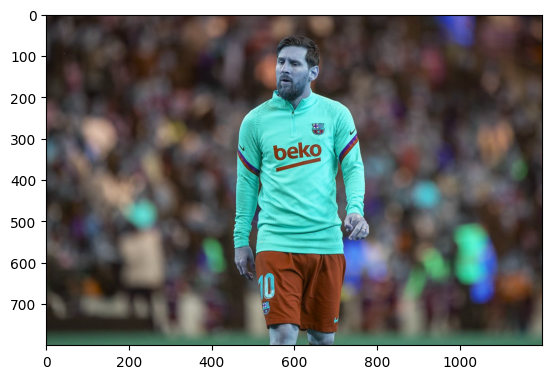

In [3]:
plt.imshow(img)


here the 3rd channel is removed

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
gray

array([[ 52,  51,  50, ...,  37,  40,  41],
       [ 51,  51,  50, ...,  37,  39,  41],
       [ 50,  50,  49, ...,  36,  38,  40],
       ...,
       [ 98,  98,  98, ..., 107, 107, 107],
       [ 98,  98,  98, ..., 107, 107, 107],
       [100, 100, 100, ..., 107, 107, 107]], dtype=uint8)

an image is basically a numpy array of values 1 to 255


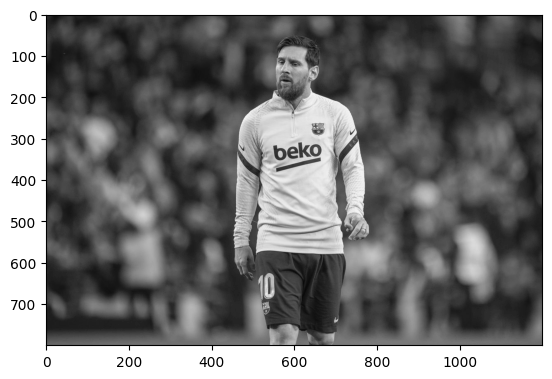

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Image classifier py/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Image classifier py/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[534,  78, 102, 102]], dtype=int32)

X Y width and height of where the face is there

face is a 2 d array

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(534, 78, 102, 102)

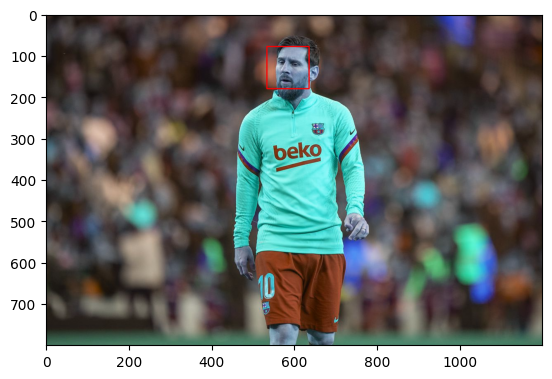

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

We make functions on black and white images as haar cascade works on black and white images

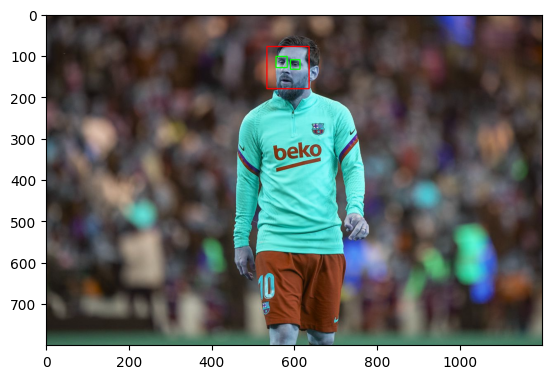

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:                                          #if there are more than 1 fACES in the faces
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)   #making box again
    roi_gray = gray[y:y+h, x:x+w]                    #region of interest deals with whats in the box and not outside
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)        #detects eyes only inside face box, which is black and white
    for (ex,ey,ew,eh) in eyes:                            #2 eyes , so for loop, new variables
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)      #makes eye box on coloured image


plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

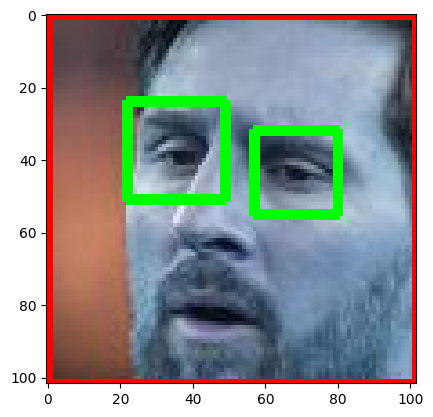

In [10]:
plt.imshow(roi_color)

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


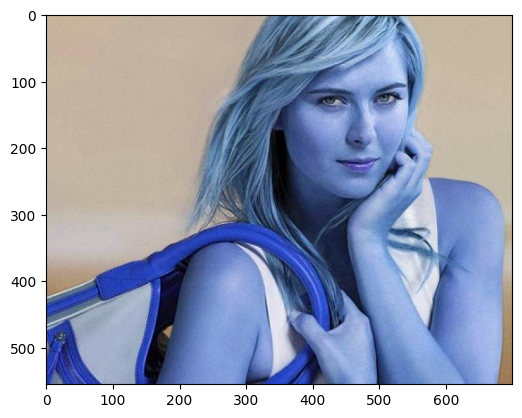

In [12]:
original_img = cv2.imread('/content/drive/MyDrive/Image classifier py/model/test_images/sharapova1.jpg')
plt.imshow(original_img)

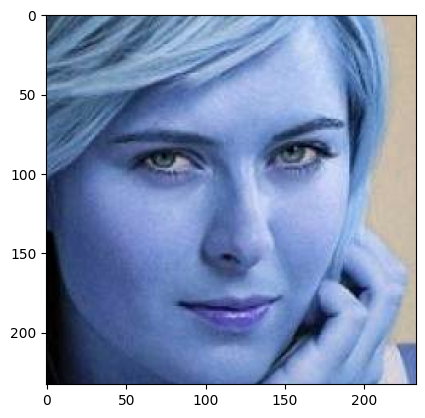

In [13]:
cropped_image = get_cropped_image_if_2_eyes('/content/drive/MyDrive/Image classifier py/model/test_images/sharapova1.jpg')
plt.imshow(cropped_image)

In [14]:
path_data='/content/drive/MyDrive/Image classifier py/model/DATASET'
path_cropped='/content/drive/MyDrive/Image classifier py/model/DATASET/cropped'

In [15]:
import os
img_dirs = []
for entry in os.scandir(path_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [16]:
img_dirs

['/content/drive/MyDrive/Image classifier py/model/DATASET/maria_sharapova',
 '/content/drive/MyDrive/Image classifier py/model/DATASET/serena_williams',
 '/content/drive/MyDrive/Image classifier py/model/DATASET/roger_federer',
 '/content/drive/MyDrive/Image classifier py/model/DATASET/virat_kohli',
 '/content/drive/MyDrive/Image classifier py/model/DATASET/lionel_messi',
 '/content/drive/MyDrive/Image classifier py/model/DATASET/.ipynb_checkpoints']

In [17]:
import shutil
if os.path.exists(path_cropped):
     shutil.rmtree(path_cropped)
os.mkdir(path_cropped)

This pieceof codes created cropped folder if it does not exist


In [ ]:
#now we store the cropped images in the cropped folder
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
  celebrity_name = img_dir.split('/')[-1]  #gets celebname from directory
  print(celebrity_name)
  count = 1

  celebrity_file_names_dict[celebrity_name] = []

  for entry in os.scandir(img_dir):
    roi_color = get_cropped_image_if_2_eyes(entry.path)       #gets cropped image numpy array

    if roi_color is not None:
      cropped_folder = path_cropped + celebrity_name      #gets dir of which folder to put image to
      if not os.path.exists(cropped_folder):
        os.mkdir(cropped_folder)                          #makes cropped dir of each celeb
        cropped_image_dirs.append(cropped_folder)         #list of cropped img dirs
        print("Generating cropped images in folder: ",cropped_folder)

      cropped_file_name = celebrity_name + str(count) + ".png"
      cropped_file_path = cropped_folder + "/" + cropped_file_name

      cv2.imwrite(cropped_file_path, roi_color)
      celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
      count += 1
